In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


# **E-Commerce Sales Analysis: Superstore Dataset (EDA, Cleaning, Insights)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
DATA_PATH = "/kaggle/input/superstore-dataset-final/Sample - Superstore.csv"
OUT_CLEAN = "superstore_cleaned.csv"  # Kaggle will save to working directory

# EDA

In [4]:
df = pd.read_csv(DATA_PATH, encoding='latin1')
print("Loaded rows, columns:", df.shape)
display(df.head())

Loaded rows, columns: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# Info & describe
print("\nData types and non-null counts:")
print(df.dtypes)
print("\nNumeric summary:")
display(df.describe())

# Missing & duplicates
print("\nMissing values per column:")
print(df.isna().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Data types and non-null counts:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Numeric summary:


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000



Missing values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Duplicate rows: 0


# Data Cleaning

In [6]:
clean_df = df.copy()

In [7]:
# Trim whitespace for object columns
str_cols = clean_df.select_dtypes(include='object').columns.tolist()
for c in str_cols:
    clean_df[c] = clean_df[c].astype(str).str.strip()

In [8]:
# Standardize Category/Sub-Category
if 'Category' in clean_df.columns:
    clean_df['Category'] = clean_df['Category'].str.title()
if 'Sub-Category' in clean_df.columns:
    clean_df['Sub-Category'] = clean_df['Sub-Category'].str.title()

In [9]:
# Convert date columns
date_cols = [c for c in clean_df.columns if 'Date' in c]
for c in date_cols:
    clean_df[c] = pd.to_datetime(clean_df[c], errors='coerce')

In [10]:
# Ensure numeric columns
for c in ['Sales','Quantity','Discount','Profit']:
    if c in clean_df.columns:
        clean_df[c] = pd.to_numeric(clean_df[c], errors='coerce')

In [11]:
# Drop rows missing crucial fields
crucial = [col for col in ['Order ID','Order Date','Sales'] if col in clean_df.columns]
before = clean_df.shape[0]
clean_df = clean_df.dropna(subset=crucial)
print(f"Dropped {before - clean_df.shape[0]} rows missing {crucial}")

Dropped 0 rows missing ['Order ID', 'Order Date', 'Sales']


In [12]:
# Remove exact duplicates
clean_df = clean_df.drop_duplicates()

# Feature Engineering

In [13]:
# Feature engineering
if 'Order Date' in clean_df.columns:
    clean_df['Order Year'] = clean_df['Order Date'].dt.year
    clean_df['Order Month'] = clean_df['Order Date'].dt.month
    clean_df['Order_MonthYear'] = clean_df['Order Date'].dt.to_period('M').astype(str)
if {'Profit','Sales'}.issubset(clean_df.columns):
    clean_df['Profit_Margin'] = np.where(clean_df['Sales'] == 0, np.nan, clean_df['Profit'] / clean_df['Sales'])

# Saving Cleaned Data Set for Power BI

In [14]:
# Save cleaned CSV
clean_df.to_csv(OUT_CLEAN, index=False)
print("Cleaned file written to:", OUT_CLEAN)

Cleaned file written to: superstore_cleaned.csv


In [15]:
display(clean_df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order_MonthYear,Profit_Margin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,2016-11,0.1600
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,2016-11,0.3000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,2016-06,0.4700
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,2015-10,-0.4000
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,2015-10,0.1125


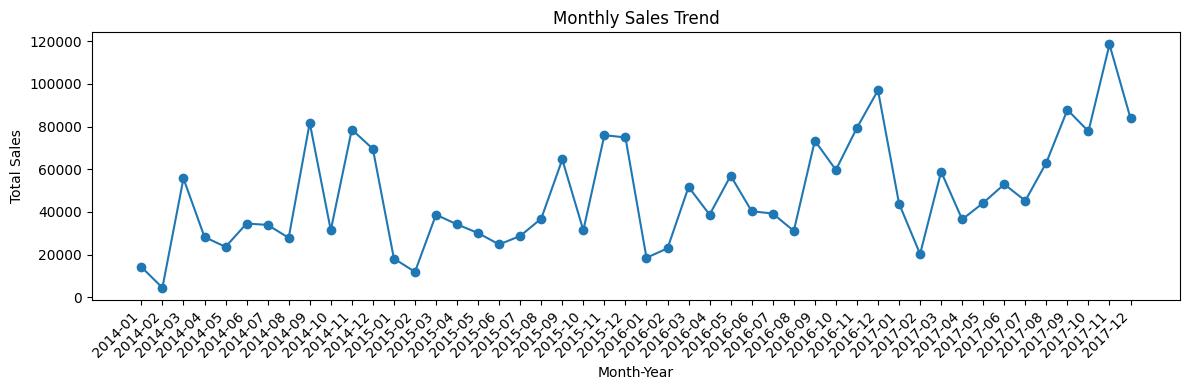

In [16]:
# 1. Monthly sales trend
if 'Order_MonthYear' in clean_df.columns:
    monthly = clean_df.groupby('Order_MonthYear', sort=True)['Sales'].sum().reset_index()
    try:
        monthly['period'] = pd.to_datetime(monthly['Order_MonthYear']).dt.to_period('M')
        monthly = monthly.sort_values('period')
    except Exception:
        pass
    plt.figure(figsize=(12,4))
    plt.plot(monthly['Order_MonthYear'], monthly['Sales'], marker='o')
    plt.title('Monthly Sales Trend')
    plt.xlabel('Month-Year')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

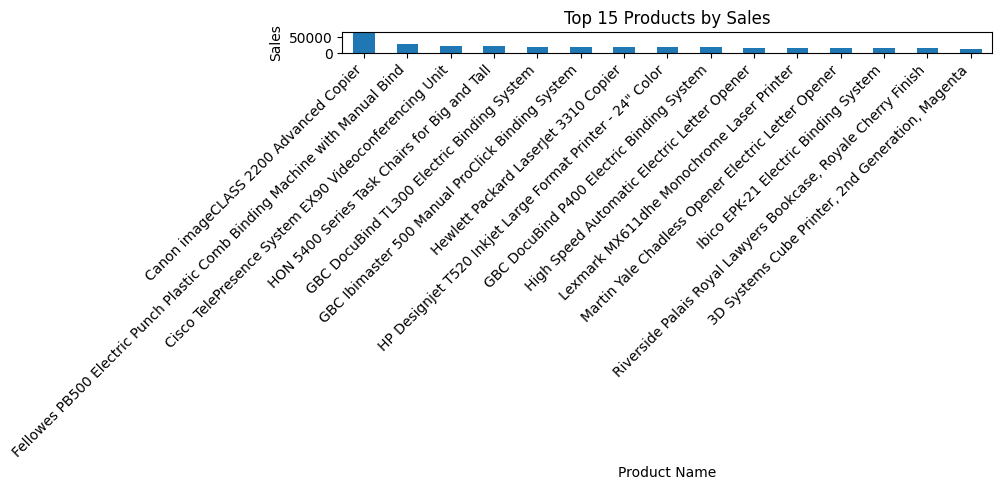

In [17]:
# 2. Top 15 products by sales
if 'Product Name' in clean_df.columns:
    top_products = clean_df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(15)
    plt.figure(figsize=(10,5))
    top_products.plot(kind='bar')
    plt.title('Top 15 Products by Sales')
    plt.ylabel('Sales')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

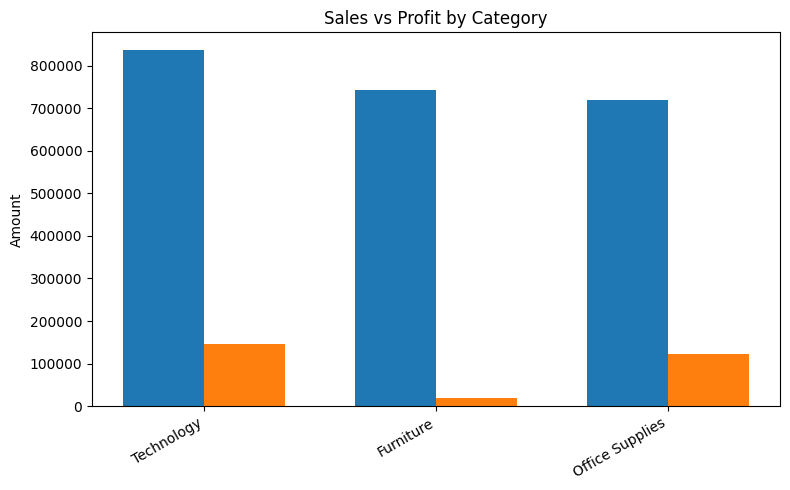

In [18]:
# 3. Sales vs Profit by Category
if 'Category' in clean_df.columns:
    cat_df = clean_df.groupby('Category').agg({'Sales':'sum','Profit':'sum'}).sort_values('Sales', ascending=False)
    ind = np.arange(len(cat_df))
    width = 0.35
    plt.figure(figsize=(8,5))
    plt.bar(ind - width/2, cat_df['Sales'], width)
    plt.bar(ind + width/2, cat_df['Profit'], width)
    plt.xticks(ind, cat_df.index, rotation=30, ha='right')
    plt.title('Sales vs Profit by Category')
    plt.ylabel('Amount')
    plt.tight_layout()
    plt.show()

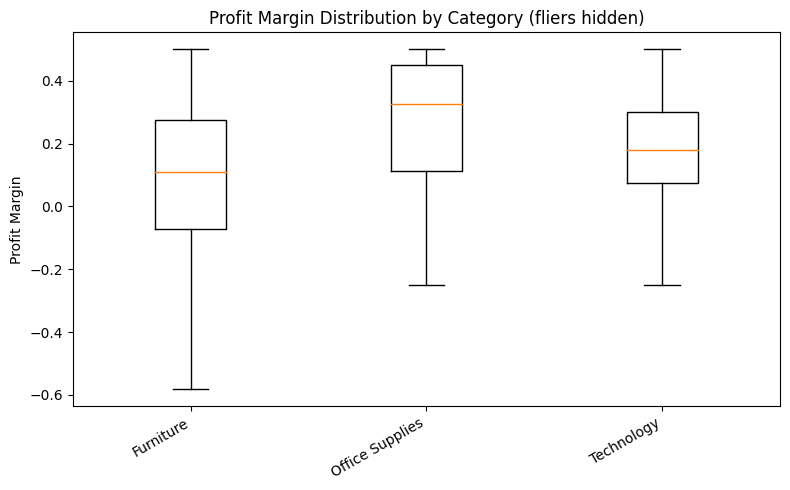

In [19]:
# 4. Profit margin boxplot by category
if 'Profit_Margin' in clean_df.columns and 'Category' in clean_df.columns:
    groups = [group.dropna().values for name, group in clean_df.groupby('Category')['Profit_Margin']]
    labels = [name for name, group in clean_df.groupby('Category')['Profit_Margin']]
    plt.figure(figsize=(8,5))
    plt.boxplot(groups, labels=labels, showfliers=False)
    plt.title('Profit Margin Distribution by Category (fliers hidden)')
    plt.ylabel('Profit Margin')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

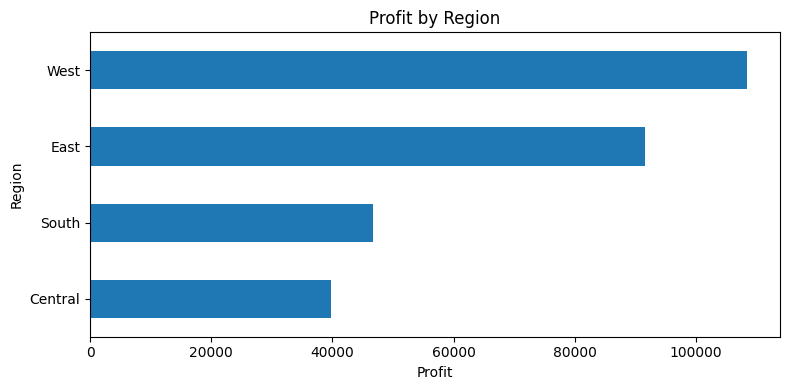

In [20]:
# 5. Profit by Region (horizontal)
if 'Region' in clean_df.columns:
    region_prof = clean_df.groupby('Region')['Profit'].sum().sort_values(ascending=True)
    plt.figure(figsize=(8,4))
    region_prof.plot(kind='barh')
    plt.title('Profit by Region')
    plt.xlabel('Profit')
    plt.tight_layout()
    plt.show()

In [21]:
# Key metrics
metrics = {
    'Total Sales': clean_df['Sales'].sum() if 'Sales' in clean_df.columns else None,
    'Total Profit': clean_df['Profit'].sum() if 'Profit' in clean_df.columns else None,
    'Total Orders': clean_df['Order ID'].nunique() if 'Order ID' in clean_df.columns else None,
    'Unique Customers': clean_df['Customer ID'].nunique() if 'Customer ID' in clean_df.columns else None,
    'Average Profit Margin': clean_df['Profit_Margin'].mean() if 'Profit_Margin' in clean_df.columns else None
}
for k,v in metrics.items():
    if pd.isna(v):
        print(f"{k}: None")
    elif isinstance(v, (int, np.integer)):
        print(f"{k}: {v:,}")
    else:
        print(f"{k}: {v:,.2f}")

Total Sales: 2,297,200.86
Total Profit: 286,397.02
Total Orders: 5,009
Unique Customers: 793
Average Profit Margin: 0.12
